In [1]:
import numpy as np
import numba as nb
import matplotlib
import matplotlib.pyplot as plt
from N2P import N2P_ratio_not_eq_Copy as N2P

a_std = np.load("../eq_arrs/eq_arrs/Luke_a.npy") #scale factor in standard cosmology
T_std = np.load("../eq_arrs/eq_arrs/Luke_T.npy") #temperature in standard cosmology

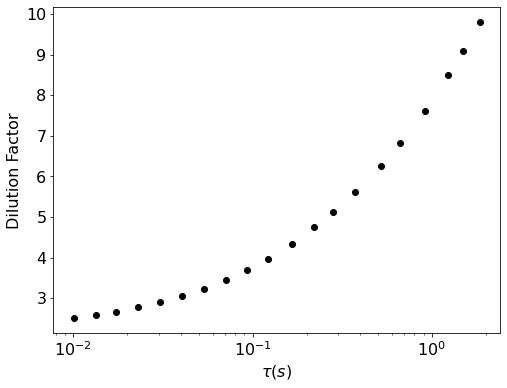

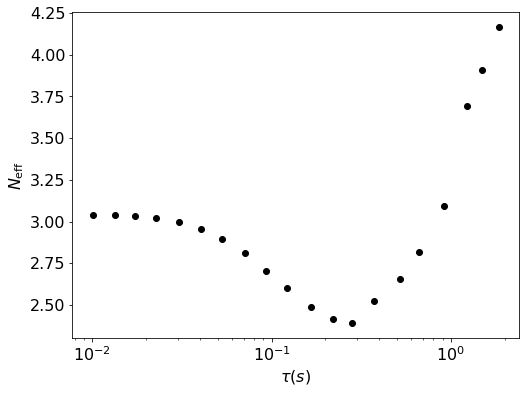

In [2]:
results = np.load("../300data/300data/300data_final.npz")
lifetime_array = results['lifetime']
dil_array = results['Dilution_Factor']
N_eff_array = results['N_eff']

plt.figure(figsize=(8,6))
plt.semilogx(lifetime_array,dil_array,'o',color='k')
plt.xlabel("$\\tau(s)$",fontsize=16)
plt.ylabel("Dilution Factor",fontsize=16)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
#plt.savefig("dilution.pdf")

plt.figure(figsize=(8,6))
plt.semilogx(lifetime_array,N_eff_array,'o',color='k')
plt.xlabel("$\\tau(s)$",fontsize=16)
plt.ylabel("$N_{\\rm eff}$",fontsize=16)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
#plt.savefig("neff.pdf")

In [3]:
data_short = np.load("../300-7e-05-FullTestNew/300-7e-05-FullTestNew/mass_300_mix_7e-05.npz", allow_pickle=True)
a_vals_short = data_short['scalefactors']
T_vals_short = data_short['temp']
e_vals_short = data_short['e']
fe_vals_short = data_short['fe']
t_vals_short = data_short['time']

data_long = np.load("../300-1.28e.05-FullTestNew/300-1.28e.05-FullTestNew/mass_300_mix_1.28e-05.npz", allow_pickle=True)
a_vals_long = data_long['scalefactors']
T_vals_long = data_long['temp']
e_vals_long = data_long['e']
fe_vals_long = data_long['fe']
t_vals_long = data_long['time']

#data_long.files
#data_short.files

In [4]:
def pp2(a_array,e_mat,T_array,fe_mat,t_array,ms,mixangle): #post processing stuff
    fe_final = fe_mat[-1] #final distribution of neutrinos #np.transpose(y_mat)[-1] ??
    N_eff = N2P.N_eff(T_array[0],T_array[-1],a_array[0],a_array[-1],fe_final,e_mat[-1],e_mat[-1][1]-e_mat[-1][0]) #This won't work w/ varying boxsize...
    dilution_factor = N2P.F(T_array[0],T_array[-1],a_array[0],a_array[-1]) 
    spb_array = N2P.spb(a_array,T_array) #entropy per baryon ratio
    #n2p, p2n, Hubble = N2P.driver(a_array, T_array, fe_mat, e_mat, ms, mixangle) #returns array of n2p rate, p2n rate, 
                                                                                #and the Hubble rate over time
    std_cosmo_spb = np.zeros(len(T_array)) + 5.9*10**9 #entropy per baryon in standard cosmology
    #t_array2,Y_array = N2P.YnYp(n2p,p2n,T_array,t_array)
    
    #I'm preeeeetty sure that the driver function and the YnYp function from N2P are obsolete, at least driver is
    #since we use entirely different code in MakeMovie.py to calculate the rates, so I'm just going to leave those
    #commented out for now and I'll fix them (or just remove them) later when I clean up the code
    
    #print("N effective is " + str(int(100*N_eff)/100)) #inaccurate due to varying boxsize I suppose? that kind of bugs me though
    #print("The dilution factor is " + str(int(100*dilution_factor)/100))
    return std_cosmo_spb, spb_array

In [5]:
std_cosmo_spb_long, spb_array_long = pp2(a_vals_long,e_vals_long,T_vals_long,fe_vals_long,t_vals_long,300,0.0000128)

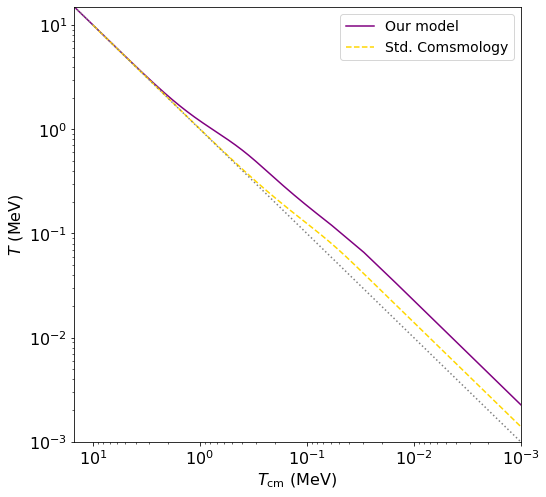

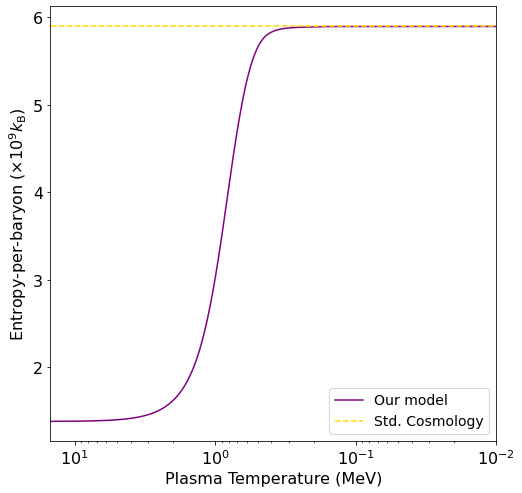

In [6]:
plt.figure(figsize=(8,8))
plt.loglog(1/a_vals_long,T_vals_long, linestyle="-", color='purple', label = "Our model")
plt.loglog(1/a_std,T_std, linestyle="--", color='gold', label = "Std. Comsmology")
plt.loglog(1/a_vals_long,1/a_vals_long, linestyle=':', color='grey')
plt.xlabel("$T_{\\rm cm}$ (MeV)",fontsize=16)
plt.ylabel("$T$ (MeV)",fontsize=16)
plt.xlim(15,0.001)
plt.ylim(0.001,15)
plt.legend(loc="upper right", fontsize=14)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.savefig("TTcmLong.pdf")   
    
plt.figure(figsize=(8,8))
plt.semilogx(T_vals_long,spb_array_long*10**-9,color='purple',label="Our model")
plt.semilogx(T_vals_long,std_cosmo_spb_long*10**-9,color='gold',linestyle="--", label="Std. Cosmology")
plt.xlabel("Plasma Temperature (MeV)",fontsize=16)
plt.ylabel("Entropy-per-baryon ($\\times 10^9 {\\rm } k_{\\rm B}$)",fontsize=16)
plt.xlim(15,0.01)
plt.legend(loc="lower right", fontsize=14)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.savefig("EntropyPerBaryonLong.pdf")

In [7]:
def pp(a_array,e_mat,T_array,fe_mat,t_array,ms,mixangle): #post processing stuff
    fe_final = fe_mat[-1] #final distribution of neutrinos #np.transpose(y_mat)[-1] ??
    N_eff = N2P.N_eff(T_array[0],T_array[-1],a_array[0],a_array[-1],fe_final,e_mat[-1],e_mat[-1][1]-e_mat[-1][0]) #This won't work w/ varying boxsize...
    dilution_factor = N2P.F(T_array[0],T_array[-1],a_array[0],a_array[-1]) 
    spb_array = N2P.spb(a_array,T_array) #entropy per baryon ratio
    #n2p, p2n, Hubble = N2P.driver(a_array, T_array, fe_mat, e_mat, ms, mixangle) #returns array of n2p rate, p2n rate, 
                                                                                #and the Hubble rate over time
    
    #Again, I'm preeeeetty sure that the driver function and the YnYp function from N2P are obsolete, at least driver
    #is since we use entirely different code in MakeMovie.py to calculate the rates, so I'm just going to leave those
    #commented out for now and I'll fix them (or just remove them) later when I clean up the code
    
    std_cosmo_spb = np.zeros(len(T_array)) + 5.9*10**9 #entropy per baryon in standard cosmology
    #t_array2,Y_array = N2P.YnYp(n2p,p2n,T_array,t_array) #hmm, what would the difference between t_array2 and t_array have been?
    
    #print("N effective is " + str(int(100*N_eff)/100)) #inaccurate due to varying boxsize I suppose? that kind of bugs me though
    #print("The dilution factor is " + str(int(100*dilution_factor)/100))
    
    #Need to rewrite N2P code for this graph
    #plt.figure(figsize=(8,8))
    #plt.loglog(T_array,n2p,label='$n\Rightarrow p$')
    #plt.loglog(T_array,p2n,label='$p\Rightarrow n$')
    #plt.loglog(T_array,Hubble, linestyle='--',label = 'Hubble rate')
    #plt.xlabel('$T$ (MeV)',fontsize=16)
    #plt.ylabel('Rate ($s^{-1}$)',fontsize=16)
    #plt.xlim(10,10**-2)
    #plt.ylim((10**-10,10**5))
    #plt.legend(loc="upper right", fontsize=14)
    #plt.tick_params(axis="x", labelsize=16)
    #plt.tick_params(axis="y", labelsize=16)
    #plt.show()
    
    
    plt.figure(figsize=(8,8))
    plt.loglog(1/a_array,T_array, linestyle="-", color='purple', label = "Our model")
    plt.loglog(1/a_std,T_std, linestyle="--", color='gold', label = "Std. Comsmology")
    plt.loglog(1/a_array,1/a_array, linestyle=':', color='grey')
    plt.xlabel("Tcm (MeV)",fontsize=16)
    plt.ylabel("T (MeV)",fontsize=16)
    plt.xlim(15,0.001)
    plt.ylim(0.001,15)
    plt.legend(loc="upper right", fontsize=14)
    plt.tick_params(axis="x", labelsize=16)
    plt.tick_params(axis="y", labelsize=16)
    plt.show()
    
    
    plt.figure(figsize=(8,8))
    plt.semilogx(T_array,spb_array*10**-9,color='purple',label="Our model")
    plt.semilogx(T_array,std_cosmo_spb*10**-9,color='gold',linestyle="--", label="Std. Cosmology")
    plt.xlabel("Plasma Temperature (MeV)",fontsize=16)
    plt.ylabel("Entropy-per-baryon ($\\times 10^9 {\\rm } k_{\\rm B}$)",fontsize=16)
    plt.xlim(15,0.01)
    plt.legend(loc="lower right", fontsize=14)
    plt.tick_params(axis="x", labelsize=16)
    plt.tick_params(axis="y", labelsize=16)
    plt.show()
    
    #Need to rewrite N2P code for this graph
    #plt.figure(figsize=(8,6))
    #plt.loglog(t_array,Y_array[0],label = '$Y_n$',color='darkturquoise')
    #plt.loglog(t_array,Y_array[1],label = '$Y_p$',color='hotpink')
    #plt.loglog(t_array,Y_array[2],label = '$Y_n$ + $Y_p$',color='blue')
    #plt.xlabel('Time (s)',fontsize=18)
    #plt.ylabel('Abundance',fontsize=18)
    #plt.tick_params(axis="x", labelsize=14)
    #plt.tick_params(axis="y", labelsize=14)
    #plt.legend(loc="lower right", fontsize=14)
    #plt.show()

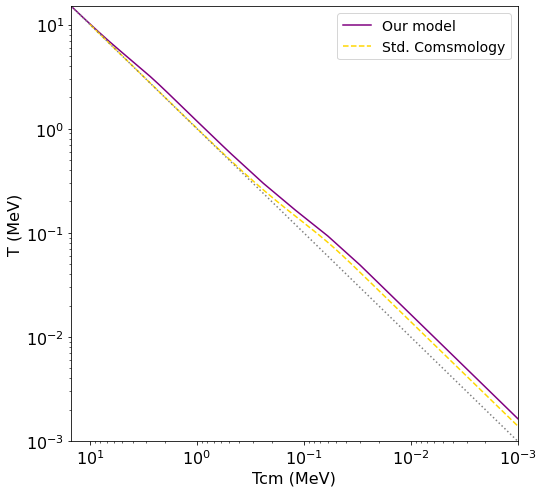

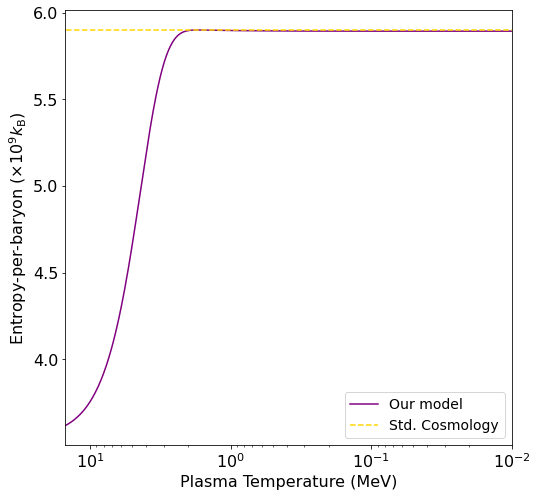

In [8]:
pp(a_vals_short,e_vals_short,T_vals_short,fe_vals_short,t_vals_short,300,0.00008)

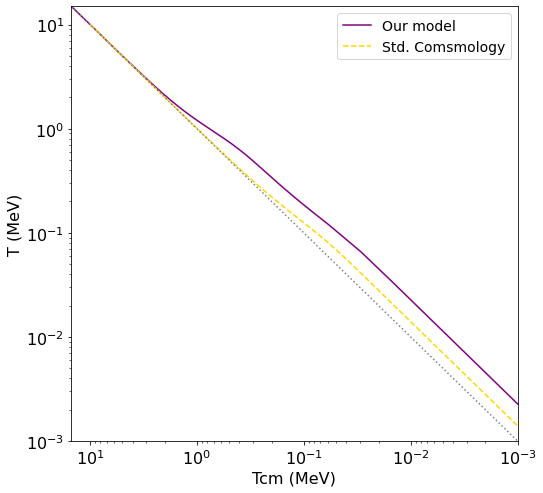

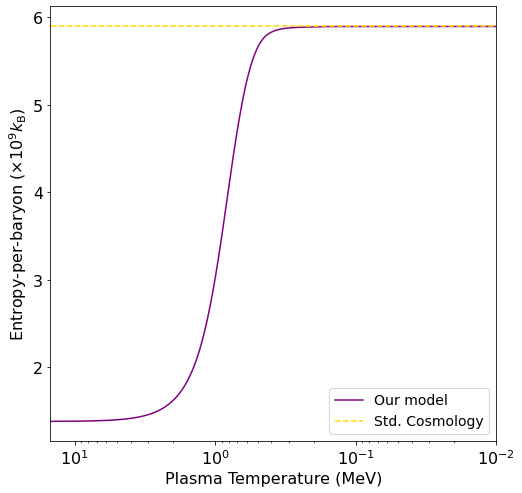

In [9]:
pp(a_vals_long,e_vals_long,T_vals_long,fe_vals_long,t_vals_long,300,0.0000128)